In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


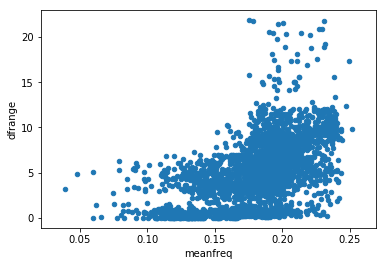

In [3]:
import seaborn
df.head()
df.plot(kind='scatter', x='meanfreq', y='dfrange')
# df.plot(kind='kde', y='meanfreq')
# seaborn.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)

In [4]:
df.shape
# print(df[df['label']=='male'].shape[0])

(3168, 21)

In [5]:
y = df['label']
X = df.drop('label', axis = 1)

In [6]:
from sklearn.preprocessing import LabelEncoder
# one hot
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

In [7]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_predicted = random_forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.976340694006


In [16]:
import pandas as pd
import xgboost as xgb
import numpy as np

# xgboost model
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Test Accuracy (xgboost)
print(metrics.accuracy_score(y_test, y_pred))

0.982649842271


In [21]:
y_train.shape

(2534,)

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Dense(256,activation = "relu", input_shape = (20,)))
model.add(Dense(256,activation = "relu"))
model.add(Dense(10,activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="Adadelta", metrics=["accuracy"])

In [61]:
batch_size = 32
epochs = 30
hist =  model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,verbose=2,validation_data = (X_test,y_test))

Train on 2534 samples, validate on 634 samples
Epoch 1/30
 - 1s - loss: 0.2935 - acc: 0.9120 - val_loss: 0.1042 - val_acc: 0.9779
Epoch 2/30
 - 0s - loss: 0.1273 - acc: 0.9641 - val_loss: 0.0705 - val_acc: 0.9779
Epoch 3/30
 - 0s - loss: 0.1001 - acc: 0.9680 - val_loss: 0.0625 - val_acc: 0.9826
Epoch 4/30
 - 0s - loss: 0.0857 - acc: 0.9743 - val_loss: 0.0666 - val_acc: 0.9779
Epoch 5/30
 - 0s - loss: 0.0811 - acc: 0.9740 - val_loss: 0.0632 - val_acc: 0.9826
Epoch 6/30
 - 0s - loss: 0.0751 - acc: 0.9775 - val_loss: 0.0640 - val_acc: 0.9795
Epoch 7/30
 - 0s - loss: 0.0673 - acc: 0.9799 - val_loss: 0.0597 - val_acc: 0.9842
Epoch 8/30
 - 0s - loss: 0.0689 - acc: 0.9779 - val_loss: 0.0648 - val_acc: 0.9748
Epoch 9/30
 - 0s - loss: 0.0641 - acc: 0.9803 - val_loss: 0.0663 - val_acc: 0.9748
Epoch 10/30
 - 0s - loss: 0.0599 - acc: 0.9822 - val_loss: 0.0640 - val_acc: 0.9779
Epoch 11/30
 - 0s - loss: 0.0584 - acc: 0.9807 - val_loss: 0.0630 - val_acc: 0.9811
Epoch 12/30
 - 0s - loss: 0.0527 - acc

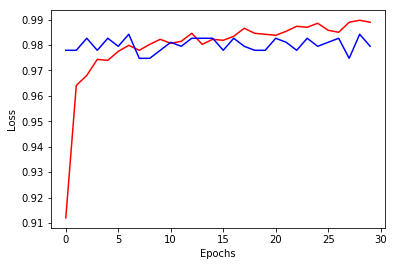

In [71]:
plt.plot(hist.history['acc'], color = 'red')
plt.plot(hist.history['val_acc'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [72]:
y_pred =model.predict(X_test)
y_pred = y_pred.flatten(order = 'F')

y_pred = np.round(y_pred)
print(metrics.accuracy_score(y_pred,y_test))

0.979495268139
